In [31]:
import pandas as pd
import matplotlib as plt
import numpy as np
import dotenv
import os

In [32]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows",100)
pd.set_option('display.max_colwidth', None)

In [33]:
dotenv.load_dotenv(dotenv.find_dotenv())
data_path = os.getenv('data_path')

In [34]:
data = pd.read_pickle(data_path)

In [35]:
##data.head()

In [36]:
data.shape

(493, 5)

In [37]:
data.isnull().sum()

ids        0
results    0
address    0
price      0
images     0
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ids      493 non-null    object
 1   results  493 non-null    object
 2   address  493 non-null    object
 3   price    493 non-null    object
 4   images   493 non-null    object
dtypes: object(5)
memory usage: 19.4+ KB


## Data Cleaning

- Price

In [39]:
## Cleaning Price column
data['price'] = data['price'].str.replace('€/m','').str.replace('.', '').astype(int)

C:\Users\amand\AppData\Local\Temp/ipykernel_16536/220940253.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace('€/m','').str.replace('.', '').astype(int)


In [40]:
#spliting data from the results columns
data['results_split'] = data['results'].str.split('\n')

- Discount info

In [41]:
#Gettiing the discount information from the previous split
data['discount'] = data['results_split'].apply(lambda x: x.pop(0) if x[0].startswith('~') or 'OFF' in x[0] else np.nan)

In [42]:
#to cast as integer, I have to fill the null values with 0. In the analysis 
data['discount'] = data['discount'].str.replace('~','').str.replace('OFF','').str.replace('%','').fillna(0).astype(int)

- Number of rooms

In [43]:
data['stanze'] = data['results_split'].apply(lambda x: x.pop(0) if x[0].startswith(('1','2','3','4','5','6','7','8','9')) else np.nan)

In [44]:
data['stanze'] = data['stanze'].str.lower().str.strip().str.replace('stanze in affitto', '').fillna(0).astype(int)

In [45]:
data['address_2'] = data['results_split'].apply(lambda x: x.pop(0))

- Description

In [46]:
data['description'] = data['results_split'].apply(lambda x: x.pop(0) if x[0].startswith(('1','2','3','4','5','6','7','8','9')) else np.nan)

In [47]:
data['description'] = data['description'].str.split('-')

- Availability

In [48]:
data['availability'] = data['results_split'].apply(lambda x: x.pop(0) if x[0].lower().startswith('disponibile')else np.nan)

- Address

In [49]:
data['address'] = data['address'].str.lower()

In [50]:
#Dropping columns created just for cleaning the data
data = data.drop(['results_split', 'address_2'], axis=1)

## Analysis

### Distributions

<AxesSubplot:ylabel='Frequency'>

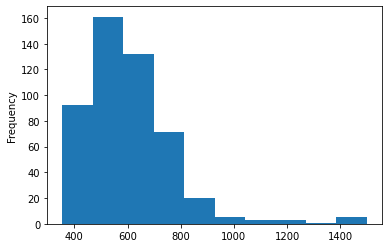

In [51]:
#Price distribution
data['price'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

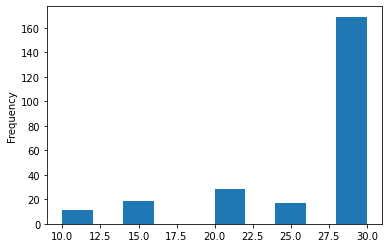

In [52]:
#Discount distribuition
data['discount'][data['discount']!=0].plot.hist()

### 2 or more rooms available

In [53]:
data['stanze'][data['stanze']!=0].value_counts().to_frame()

,stanze
2,103
3,96
4,72
5,34
6,19
7,14
8,9
10,5
9,4
11,4


### Adresses with more offers

In [54]:
data['address'].value_counts().head()

via salvatore barzilai      9
largo cavalieri di malta    7
viale abruzzi               6
via dei mandorli            5
via bartolomeo d'alviano    5
Name: address, dtype: int64